In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [ ]:
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Membuat model SVM dengan kernel linear
model = SVC (kernel='poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred = model.predict(X_test)
#Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
#Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 94.74%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           B       0.92      1.00      0.96        71
           M       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114




Confusion Matrix:
 [[71  0]
 [ 6 37]]


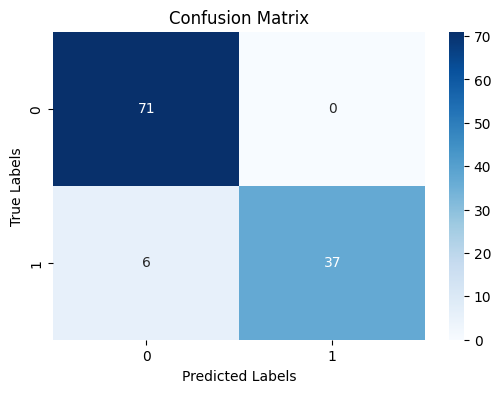

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Cetak confusion matrix di terminal
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # tambahin '=' di annot=True
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

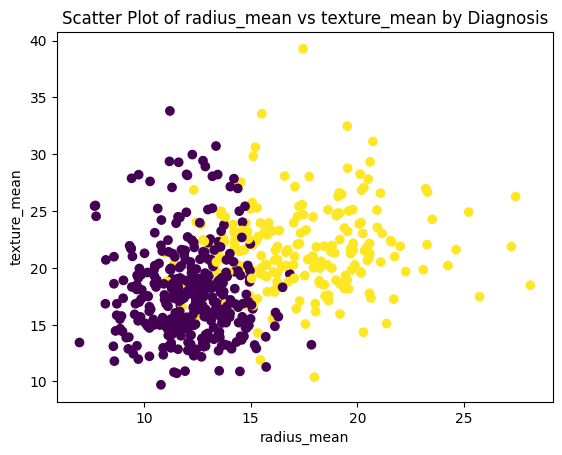

In [ ]:
import matplotlib.pyplot as plt

# Replace with the feature columns you want to visualize
feature1 = 'radius_mean'
feature2 = 'texture_mean'

plt.scatter(df[feature1], df[feature2],
            c=df['diagnosis'].astype('category').cat.codes)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f"Scatter Plot of {feature1} vs {feature2} by Diagnosis")
plt.show()

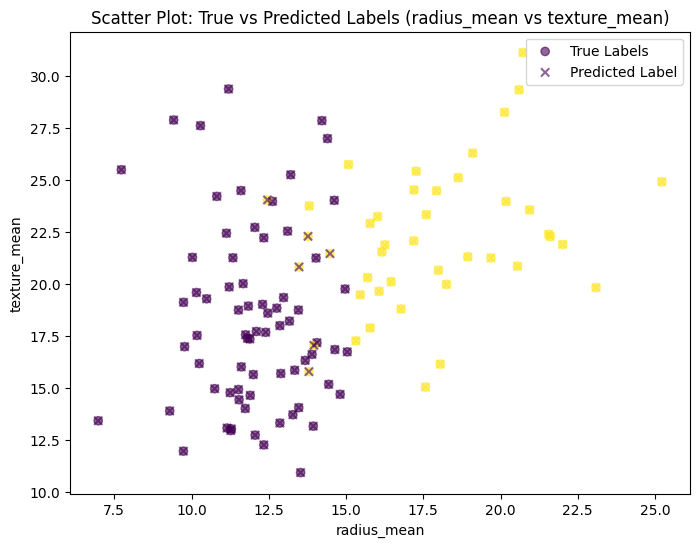

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(8, 6))

# Replace with the feature columns you want to visualize from your dataset
feature1 = 'radius_mean'
feature2 = 'texture_mean'

plt.scatter(X_test[feature1], X_test[feature2], c=y_test_encoded, cmap='viridis', marker='o', label='True Labels', alpha=0.6)
plt.scatter(X_test[feature1], X_test[feature2], c=y_pred_encoded, cmap='viridis', marker='x', label='Predicted Label', alpha=0.6)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot: True vs Predicted Labels ({feature1} vs {feature2})')
plt.legend()
plt.show()

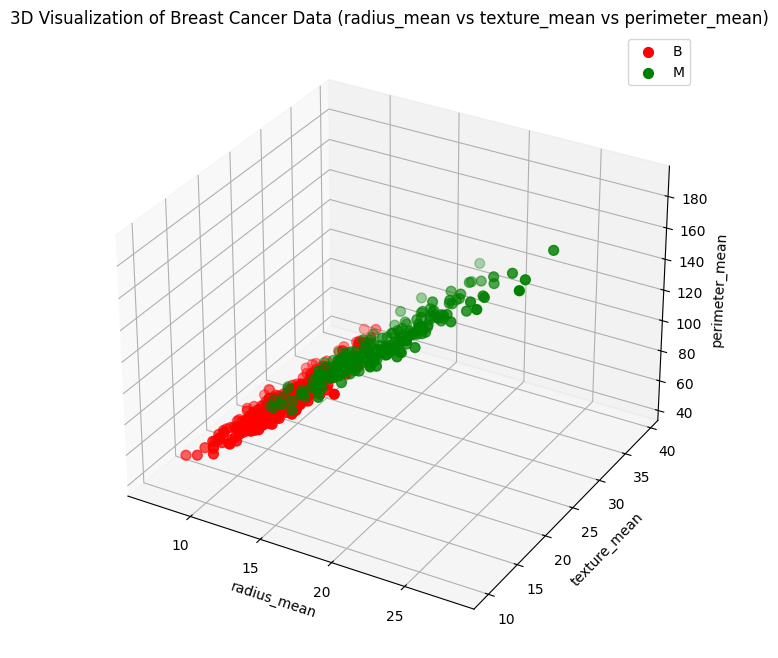

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Encode the 'diagnosis' column for coloring
le = LabelEncoder()
df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])

# Replace with the three feature columns you want to visualize
feature1 = 'radius_mean'
feature2 = 'texture_mean'
feature3 = 'perimeter_mean'

# Plot 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colors for each class (M and B)
colors = ['r', 'g']
labels = le.classes_

# Plot each diagnosis with a different color
for i, diagnosis in enumerate(labels):
    subset = df[df['diagnosis_encoded'] == i]
    ax.scatter(
        subset[feature1],
        subset[feature2],
        subset[feature3],
        color=colors[i],
        label=diagnosis,
        s=50
    )

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title(f'3D Visualization of Breast Cancer Data ({feature1} vs {feature2} vs {feature3})')
ax.legend()
plt.show()

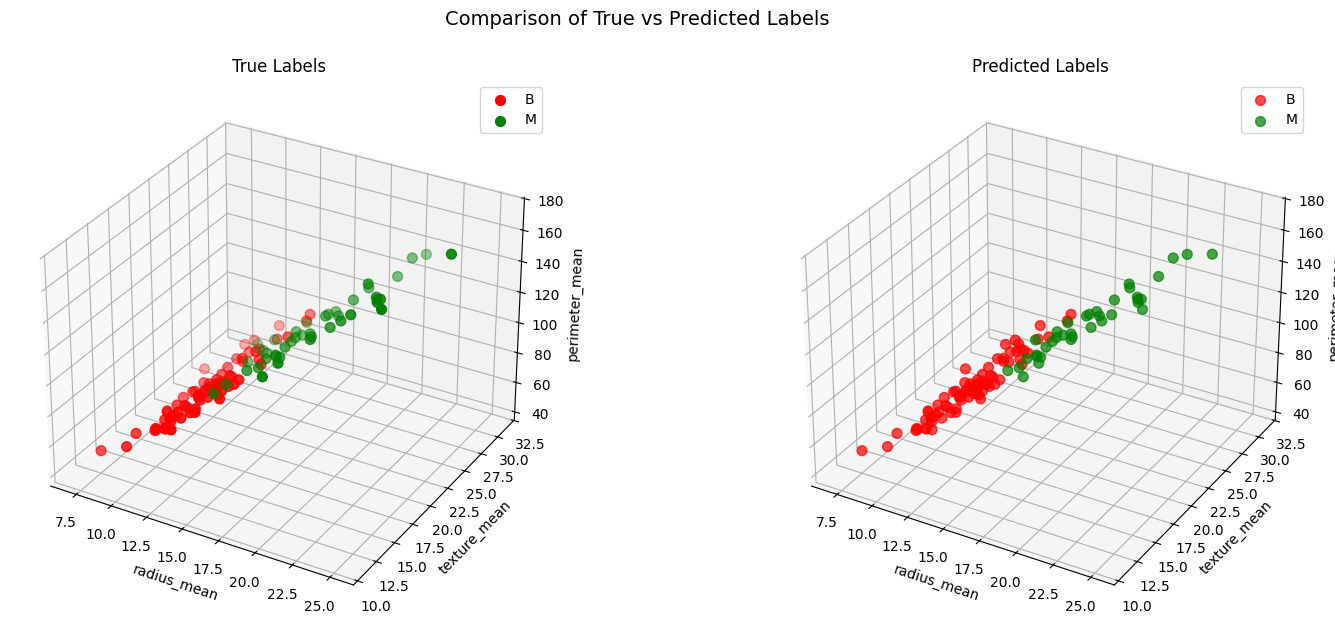

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode the 'diagnosis' column for coloring
le = LabelEncoder()
df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])
y_test_encoded = le.transform(y_test)
y_pred_encoded = le.transform(y_pred)


colors = ['r', 'g'] # Two colors for two classes (B and M)
labels = le.classes_

fig = plt.figure(figsize=(18, 7))

# Replace with the three feature columns you want to visualize
feature1 = 'radius_mean'
feature2 = 'texture_mean'
feature3 = 'perimeter_mean'

# Plotting True Labels
ax1 = fig.add_subplot(121, projection='3d') # Use 121 for the first subplot
for i, diagnosis in enumerate(labels):
    # Filter X_test based on true encoded labels
    subset = X_test[y_test_encoded == i]
    ax1.scatter(
        subset[feature1],
        subset[feature2],
        subset[feature3],
        color=colors[i],
        label=diagnosis,
        s=50
    )
ax1.set_title('True Labels')
ax1.set_xlabel(feature1)
ax1.set_ylabel(feature2)
ax1.set_zlabel(feature3)
ax1.legend()

# Plotting Predicted Labels
ax2 = fig.add_subplot(122, projection='3d') # Use 122 for the second subplot

# plot each species with a different color based on predicted label
for i , diagnosis in enumerate(labels):
  # filter using encoded predicted
  subset = X_test[y_pred_encoded == i]
  ax2.scatter(
      subset[feature1],
      subset[feature2],
      subset[feature3],
      color=colors[i],
      label=diagnosis,
      s=50,
      alpha=0.7
  )

ax2.set_xlabel(feature1)
ax2.set_ylabel(feature2)
ax2.set_zlabel(feature3)
ax2.set_title('Predicted Labels')
ax2.legend()

plt.suptitle('Comparison of True vs Predicted Labels', fontsize=14)
plt.show()